In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [3]:
data = pd.read_csv("archive/heart.csv")
data.head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


In [4]:
print(data.columns.values)

['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal' 'target']


In [5]:
 # One-hot encoding
dfs = pd.get_dummies(data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [6]:
# Scaling
sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dfs[col_to_scale] = sc.fit_transform(dfs[col_to_scale])

In [7]:
# Splitting the data
X = dfs.drop('target', axis=1)
y = dfs.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

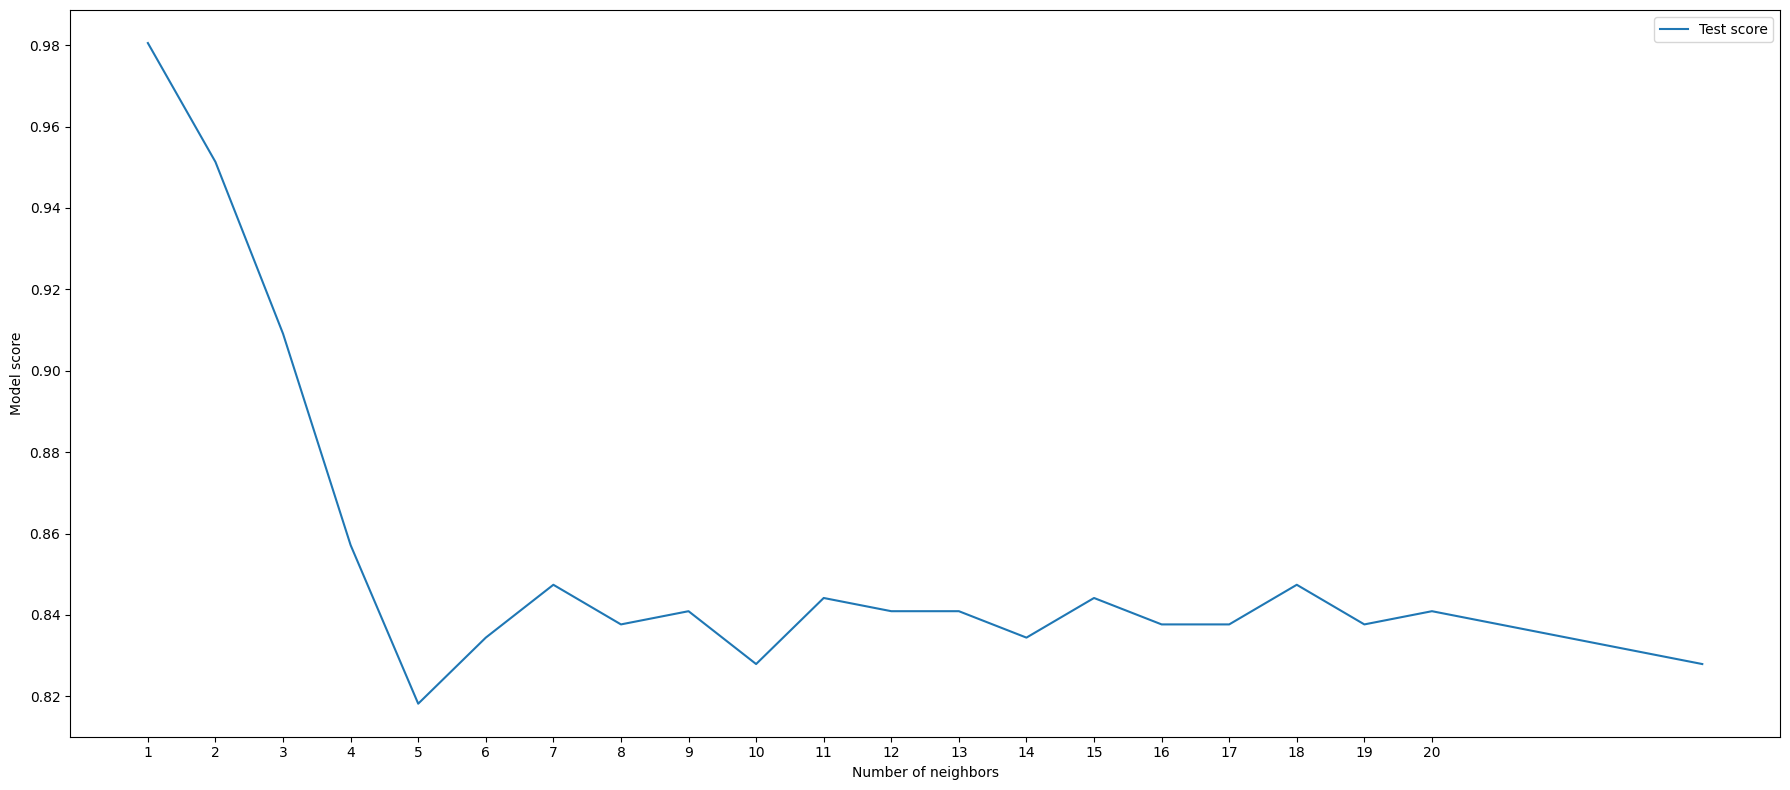

In [8]:
# Hyperparameter Optimization

test_score = []
neighbors = range(1, 25)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    test_score.append(accuracy_score(y_test, model.predict(X_test)))

plt.figure(figsize=(18, 8))
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.tight_layout()

In [43]:
knn = KNeighborsClassifier(n_neighbors = 19)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [44]:
print("Acc ",accuracy_score(y_test, y_pred))

Acc  0.8901098901098901


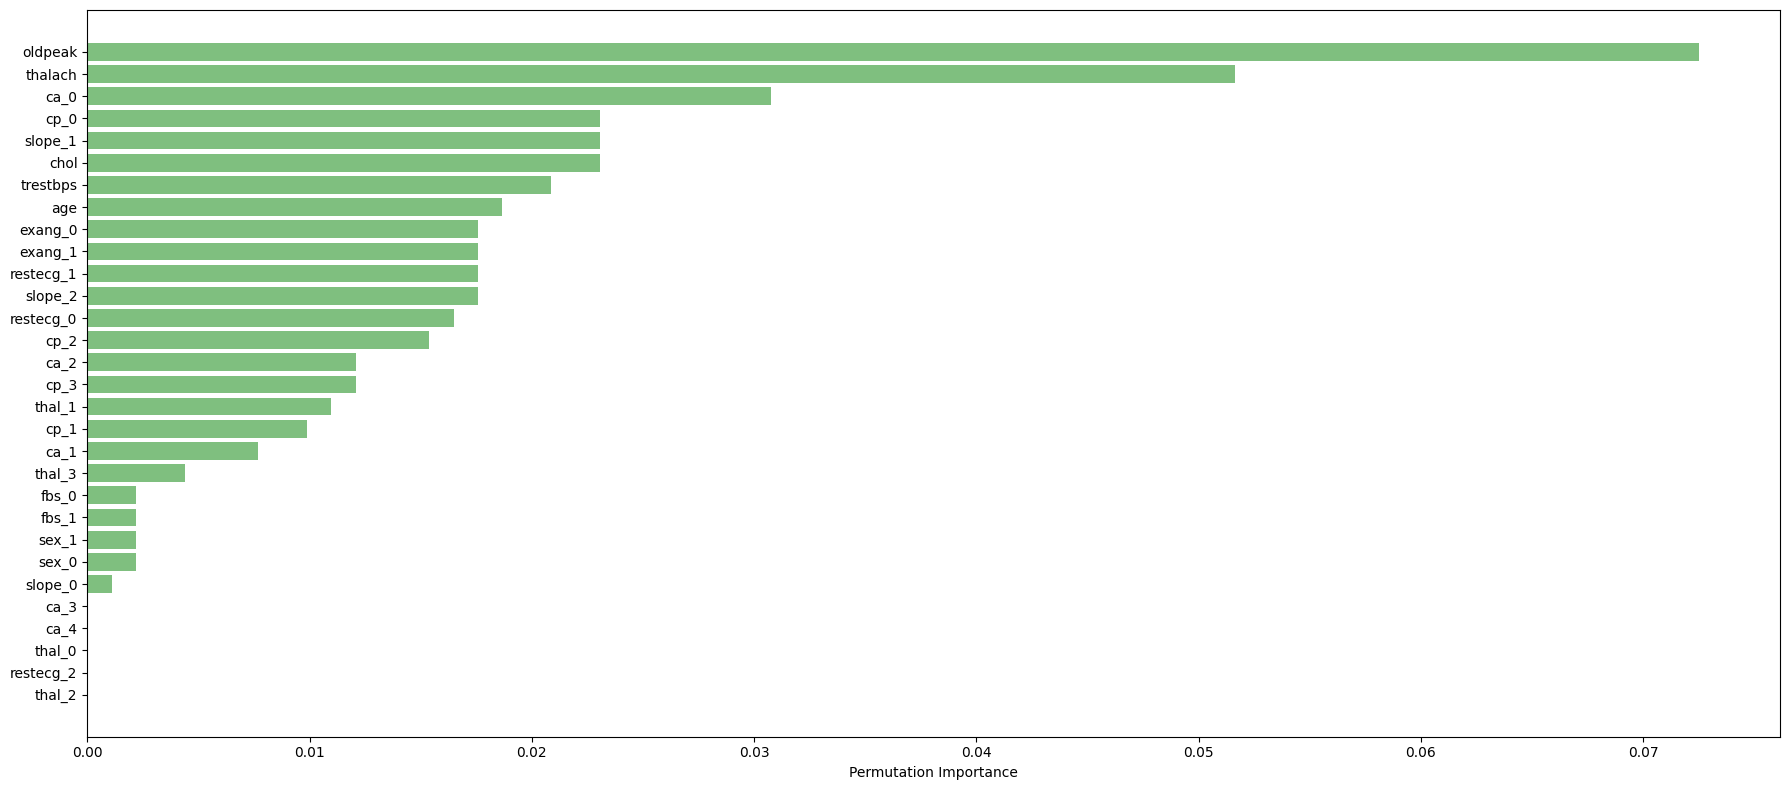

In [45]:
from sklearn.inspection import permutation_importance

# Fit the model and make predictions
knn = KNeighborsClassifier(n_neighbors = 19)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Permutation importance
result = permutation_importance(knn, X_test, y_test, n_repeats=10,
                                  random_state=42, scoring='accuracy')

# Sorting the features
sorted_idx = result.importances_mean.argsort()

# Plotting the feature importance
plt.figure(figsize=(18, 8))
plt.barh(X.columns[sorted_idx], result.importances_mean[sorted_idx],
         color='g', alpha=0.5)
plt.xlabel("Permutation Importance")
plt.tight_layout()


test